In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

'[' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from fastai.vision import *
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastcore.all import *
import time
from fastdownload import download_url

In [4]:
def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [5]:
urls = search_images('naruto photos', max_images=1)
urls[0]

'https://yt3.ggpht.com/a-/AN66SAywz8VYOYp_eLp9xtgyfp2QbCtFkvtmIKpoPg=s900-mo-c-c0xffffffff-rj-k-no'

In [6]:

dest = './naruto.jpg'
download_url(urls[0], dest)

Path('naruto.jpg')

In [7]:
searches = 'naruto uzumaki','sasuke uchiha'
path = Path('images')


In [ ]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

In [8]:
fns = get_image_files(path)
fns

(#345) [Path('images/naruto uzumaki/00000000.jpg'),Path('images/naruto uzumaki/00000001.jpg'),Path('images/naruto uzumaki/00000002.jpg'),Path('images/naruto uzumaki/00000003.jpg'),Path('images/naruto uzumaki/00000004.jpg'),Path('images/naruto uzumaki/00000006.jpg'),Path('images/naruto uzumaki/00000006.png'),Path('images/naruto uzumaki/00000008.jpg'),Path('images/naruto uzumaki/00000009.jpg'),Path('images/naruto uzumaki/00000009.png')...]

In [9]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink);

In [11]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = images.dataloaders(path)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


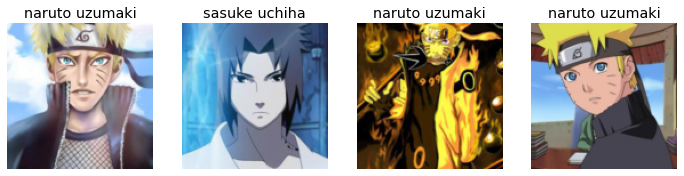

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


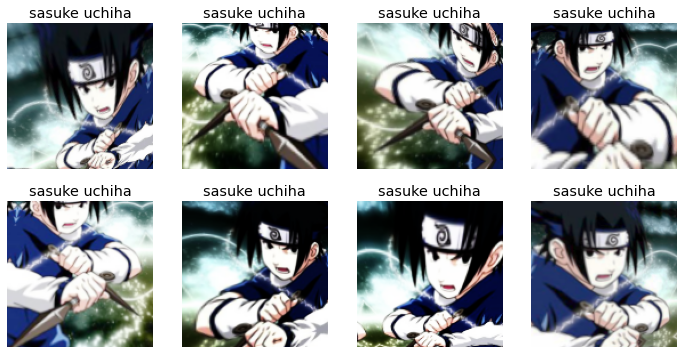

In [13]:
images = images.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = images.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
images = images.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = images.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [19]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Dalpreet.Johal/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:17<00:00, 2.75MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.231183,0.413750,0.176471,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.502575,0.190296,0.073529,00:19
1,0.401654,0.104116,0.044118,00:19
2,0.321792,0.079977,0.044118,00:19
3,0.274344,0.047697,0.029412,00:18


In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: name 'learn' is not defined

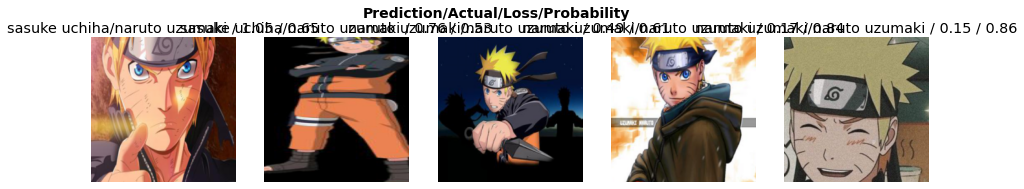

In [21]:
interp.plot_top_losses(5, nrows=1)

In [22]:
learn.export()

In [16]:

learn_inf = load_learner('./export.pkl')

In [17]:
learn_inf.predict('./naruto.jpg')

('naruto uzumaki', TensorBase(0), TensorBase([0.9936, 0.0064]))

In [18]:
learn_inf.dls.vocab

['naruto uzumaki', 'sasuke uchiha']